# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from scipy.stats.stats import pearsonr
from collections import defaultdict

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [2]:
def GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type ):
## write code here for the Distance function here # 
#     if Distance_Type == 'Ecluidian':
#         Cluster_Distance = np.linalg.norm(np.array(Cluster_Centroids) - np.array(Data_points))
    Cluster_Distance=[]
    for point in Data_points:
        dist=[]
        for centroid in Cluster_Centroids:
            if Distance_Type == 'Ecluidian':
                dist.append(np.linalg.norm(np.array(centroid) - np.array(point)))
            if Distance_Type == 'Pearson':
                dist.append(np.corrcoef(np.array(centroid) , np.array(point)))
#                 dist.append(pearsonr(np.array(centroid) , np.array(point)))
        Cluster_Distance.append(dist)
    return np.array(Cluster_Distance)


In [130]:
dist=GUC_Distance([(1,1),(2,1)],[(1,1),(2,1),(4,3),(5,4)], 'Ecluidian')
# index=np.where(dist[0] == min(dist[0]))
# index[0][0]
# dist[0].index(min(dist[0]))
# np.mean(dist)
dist

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [3.60555128, 2.82842712],
       [5.        , 4.24264069]])

In [49]:
# c=np.matrix([[(1,1),(2,1)],[(1,1),(2,1),(4,3),(5,4)]])
# c[0,0]

[(1, 1), (2, 1)]

> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [3]:
def GUC_Kmean(Data_points, Number_of_Clusters, Distance_Type):
    # write code for intial cluster heads here
    # write your your loop
    Final_Cluster_Distance = []
    Cluster_assig = []
    Cluster_Metric = []
    rand = np.random.choice(len(Data_points), Number_of_Clusters, replace=False)
    Cluster_Centroids = []
    MSD = {}
    distlists = {}
    cluster_points_ = defaultdict(list)
    cluster_centers_={}
    old_mean = 1
    new_mean = 0.1
    if type(Data_points[0]) != list or type(Data_points[0]) != int:
        for i in range(len(Data_points)) :
            Data_points[i]=tuple(Data_points[i])
    # Generate random centroids
    for x in rand:
        Cluster_Centroids.append(Data_points[x])
        MSD[Data_points[x]] = []
        distlists[Data_points[x]] = []
        counter = 0
    while new_mean / old_mean < 0.9 or new_mean / old_mean > 1:
#         print(f'Counter                                   ++++_____===== {counter}')

        counter = counter + 1
        old_mean = new_mean
        new_mean = 0
        Cluster_Distance = GUC_Distance(Cluster_Centroids, Data_points, Distance_Type)
        t=0
        # Assigning each
        for point in Cluster_Distance:
            index = np.where(point == min(point))
            cluster_centers_[index[0][0]]= Cluster_Centroids[index[0][0]]
            cluster_points_[index[0][0]].append(Data_points[t])
            t=t+1
            Cluster_assig.append(index[0][0] + 1)
        x = 0
        data_lists = defaultdict(list)
        # Calculate MSD
        for cluster in Cluster_assig:
#             print(f'distlists{distlists}')
            if type(Cluster_Centroids[0]) == list:
                distlists[tuple(Cluster_Centroids[cluster - 1])]
            else:
                distlists[Cluster_Centroids[cluster - 1]]
#                 print('12345678====================')
            Cluster_Distance[x][cluster - 1]
            if type(Cluster_Centroids[0]) == list:
                distlists[tuple(Cluster_Centroids[cluster - 1])].append(
                    Cluster_Distance[x][cluster - 1] * Cluster_Distance[x][cluster - 1])
            else:
                distlists[Cluster_Centroids[cluster - 1]].append(
                    Cluster_Distance[x][cluster - 1] * Cluster_Distance[x][cluster - 1])
            if type(Cluster_Centroids[0]) == list:
               data_lists[tuple(Cluster_Centroids[cluster - 1])].append(Data_points[x])
            else:
                data_lists[Cluster_Centroids[cluster - 1]].append(Data_points[x])
            x = x + 1
        k = 0
        for dist_list in distlists:
            length = len(distlists[dist_list])
            summation = sum(distlists[dist_list])
            if type(Cluster_Centroids[0]) == list:
               MSD[tuple(Cluster_Centroids[k])] = summation / length
            else :
                MSD[Cluster_Centroids[k]] = summation / length
            new_mean = new_mean + summation / length
#             print(f'lenfth {length}')
#             print(f'summation {summation}')
#             print(f'sum / len {summation / length}')
#             print(f'new_mean {new_mean}')
            k = k + 1
        # Update centroids
#         print(dict(data_lists))
        data_lists = dict(data_lists)
        Cluster_Centroids = []
        for old_centroid in data_lists:
#             print(f'old centroid {data_lists[old_centroid]}')
            listA = data_lists[old_centroid]
            #             print('sssssssssssss1')
            if type(listA[0]) != int:
               summ = [0] * len(listA[0])
            else:
#                print('---------------------------------------------')
               summ = 0
            #             print('sssssssssssss2')
            for element in listA:
                if type(listA[0]) != int:
                   leg = len(element)
                   y = 0
                   #                 print('sssssssssssss3')
                   while y < leg:
                       summ[y] = summ[y] + element[y]
                       y = y + 1
            #                     print('sssssssssssss4')
                else:
                    summ=summ+element
            # len(summ)
            final_sum = []
            if type(listA[0]) != int:
               for elemen in summ:
                  final_sum.append(elemen / len(listA))
            else:
                final_sum.append(summ / len(listA))
#             print(summ)
#             print(final_sum)
            new_centroid = final_sum
            Cluster_Centroids.append(new_centroid)
#         print(f'new centroids {Cluster_Centroids}')
#         print(f'MSD {MSD}')
#         print(f'Cluster_Distance {Cluster_Distance}')
#         print(f'Cluster_assig {Cluster_assig}')
        Final_Cluster_Distance = Cluster_Distance
        Cluster_Metric = distlists
        Cluster_Metric = 0
        for p in MSD:
            Cluster_Metric=Cluster_Metric+MSD[p]
        distlists = {}
        for x in Cluster_Centroids:
#             print(f'dsssds 00 0 0 00 {x}')
            distlists[tuple(x)] = []
        labels_= Cluster_assig
        Cluster_assig = []
        MSD = {}
    
#         print(f'ratio {new_mean / old_mean}')
    return [Final_Cluster_Distance, Cluster_Metric, labels_, cluster_centers_, cluster_points_]

In [149]:
GUC_Kmean ( [(1,1),(2,1),(4,3),(5,4)], 2,  "Ecluidian" )

[[],
 [1, 2, 2, 2],
 {(1, 1): [0.0], (2, 1): [0.0, 2.8284271247461903, 4.242640687119285]},
 array([[0.        , 1.        ],
        [1.        , 0.        ],
        [3.60555128, 2.82842712],
        [5.        , 4.24264069]])]

In [49]:
GUC_Kmean ( [(1,1),(2,1),(4,3),(5,4)], 2,  "Ecluidian" )

Counter                                   ++++_____===== 0
distlists{(4, 3): [], (5, 4): []}
12345678====================
distlists{(4, 3): [12.999999999999998], (5, 4): []}
12345678====================
distlists{(4, 3): [12.999999999999998, 8.000000000000002], (5, 4): []}
12345678====================
distlists{(4, 3): [12.999999999999998, 8.000000000000002, 0.0], (5, 4): []}
12345678====================
lenfth 3
summation 21.0
sum / len 7.0
new_mean 7.0
lenfth 1
summation 0.0
sum / len 0.0
new_mean 7.0
{(4, 3): [(1, 1), (2, 1), (4, 3)], (5, 4): [(5, 4)]}
old centroid [(1, 1), (2, 1), (4, 3)]
[7, 5]
[2.3333333333333335, 1.6666666666666667]
old centroid [(5, 4)]
[5, 4]
[5.0, 4.0]
new centroids [[2.3333333333333335, 1.6666666666666667], [5.0, 4.0]]
MSD {(4, 3): 7.0, (5, 4): 0.0}
Cluster_Distance [[3.60555128 5.        ]
 [2.82842712 4.24264069]
 [0.         1.41421356]
 [1.41421356 0.        ]]
Cluster_assig [1, 1, 1, 2]
dsssds 00 0 0 00 [2.3333333333333335, 1.6666666666666667]
dsssds 00

[array([[0.5       , 4.30116263],
        [0.5       , 3.53553391],
        [3.20156212, 0.70710678],
        [4.60977223, 0.70710678]]),
 {(1.5, 1.0): [0.25, 0.25],
  (4.5, 3.5): [0.5000000000000001, 0.5000000000000001]}]

In [50]:
# The example from the lecture with answer =>> u1=7, u2= 25 slide #30
GUC_Kmean([2, 3, 4, 10, 11, 12, 20, 25, 30], 2, "Ecluidian")

Counter                                   ++++_____===== 0
distlists{4: [], 2: []}
12345678====================
distlists{4: [], 2: [0.0]}
12345678====================
distlists{4: [1.0], 2: [0.0]}
12345678====================
distlists{4: [1.0, 0.0], 2: [0.0]}
12345678====================
distlists{4: [1.0, 0.0, 36.0], 2: [0.0]}
12345678====================
distlists{4: [1.0, 0.0, 36.0, 49.0], 2: [0.0]}
12345678====================
distlists{4: [1.0, 0.0, 36.0, 49.0, 64.0], 2: [0.0]}
12345678====================
distlists{4: [1.0, 0.0, 36.0, 49.0, 64.0, 256.0], 2: [0.0]}
12345678====================
distlists{4: [1.0, 0.0, 36.0, 49.0, 64.0, 256.0, 441.0], 2: [0.0]}
12345678====================
lenfth 8
summation 1523.0
sum / len 190.375
new_mean 190.375
lenfth 1
summation 0.0
sum / len 0.0
new_mean 190.375
{2: [2], 4: [3, 4, 10, 11, 12, 20, 25, 30]}
old centroid [2]
---------------------------------------------
2
[2.0]
old centroid [3, 4, 10, 11, 12, 20, 25, 30]
----------------------

[array([[ 1., 16.],
        [ 0., 15.],
        [ 1., 14.],
        [ 7.,  8.],
        [ 8.,  7.],
        [ 9.,  6.],
        [17.,  2.],
        [22.,  7.],
        [27., 12.]]),
 {(3.0,): [1.0, 0.0, 1.0, 49.0], (18.0,): [49.0, 36.0, 4.0, 49.0, 144.0]}]

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [4]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [19]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors b -> blue, r -> red
    alpha = 0.5  #color obaque, how obague my datapoints are
    s = 20 # size of point circle
    plt.gca().set_aspect('equal') # gca ==> get current access to make it symetric
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s) #
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [5]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def My_display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmykbrgcmyk'  #List colors b -> blue, r -> red
    alpha = 0.5  #color obaque, how obague my datapoints are
    s = 20 # size of point circle
    plt.gca().set_aspect('equal') # gca ==> get current access to make it symetric
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s) #
    else:
        for i in range(num_clusters):
            for point in km[4][i]:
                plt.scatter(point[0], point[1], c = color[i],alpha = alpha,s=s)
            plt.scatter(km[3][i][0],km[3][i][1],c = color[i], marker = 'x', s = 100)

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

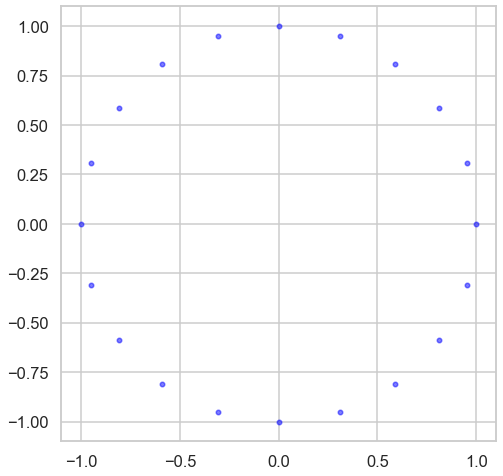

In [150]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X)

In [151]:
X[0][0]

1.0

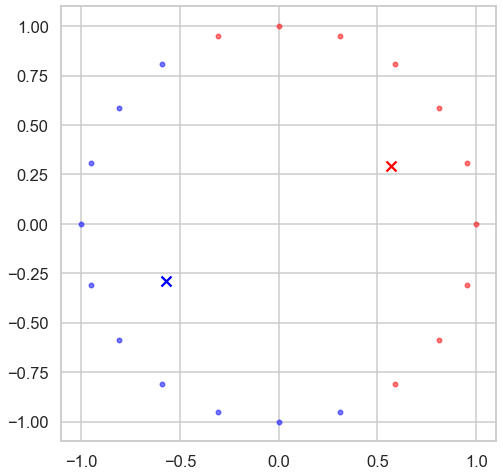

In [152]:
num_clusters = 2
km =KMeans(n_clusters = num_clusters, random_state=10, n_init = 1)
km.fit(X)
display_cluster(X, km, num_clusters)

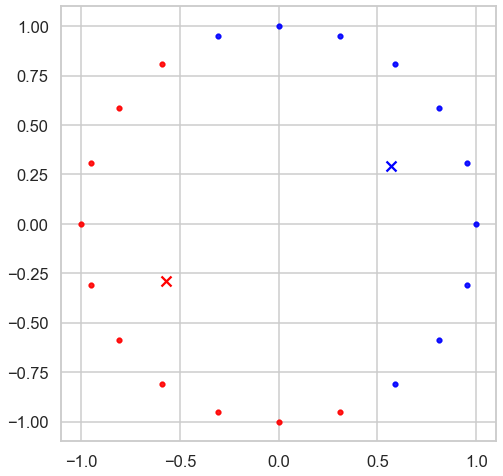

In [142]:
num_clusters = 2
# km =KMeans(n_clusters = num_clusters, random_state=10, n_init = 1)
km = GUC_Kmean(list(X), num_clusters, "Ecluidian")
# km.fit(X)
My_display_cluster(X, km, num_clusters)

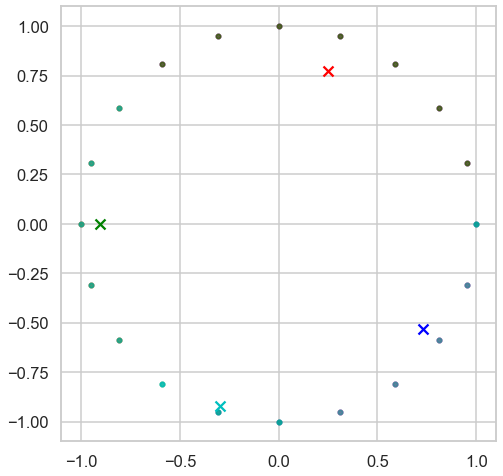

In [155]:
num_clusters = 4
# km =KMeans(n_clusters = num_clusters, random_state=10, n_init = 1)
km = GUC_Kmean(list(X), num_clusters, "Ecluidian")
# km.fit(X)
My_display_cluster(X, km, num_clusters)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

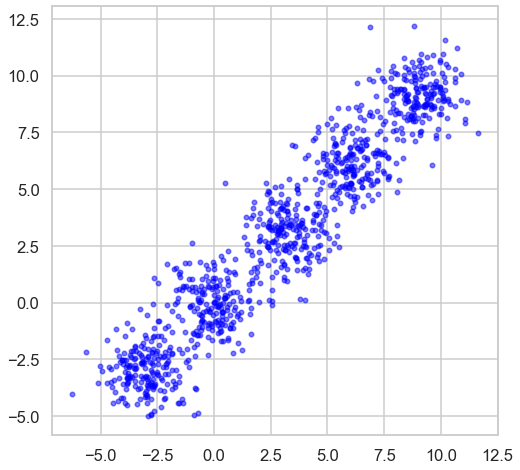

In [143]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)

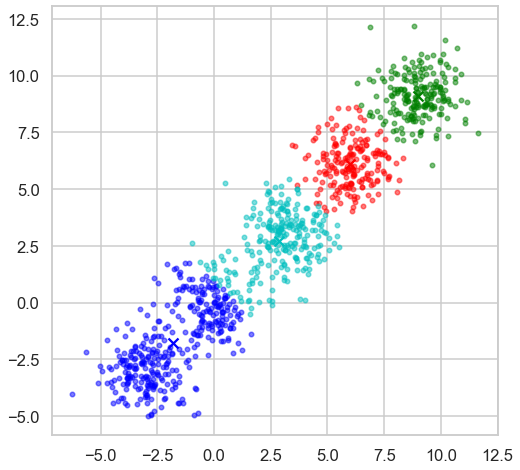

In [144]:
num_clusters = 4
km =KMeans(n_clusters = num_clusters, random_state=10, n_init = 1)
km.fit(X)
display_cluster(X, km, num_clusters)

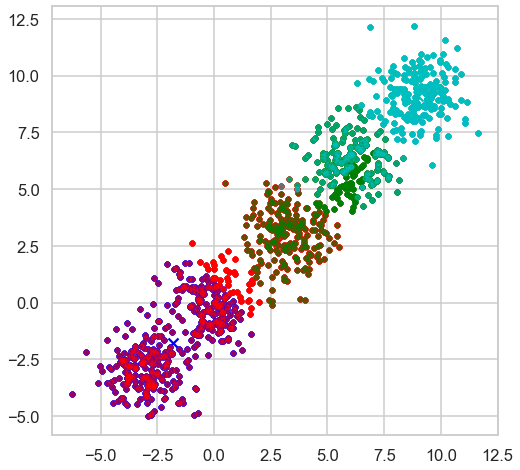

In [145]:
num_clusters = 4
# km =KMeans(n_clusters = num_clusters, random_state=10, n_init = 1)
km = GUC_Kmean(list(X), num_clusters, "Ecluidian")
# km.fit(X)
My_display_cluster(X, km, num_clusters)

#### 2.3. Example 3 : moons Data Gen and display 

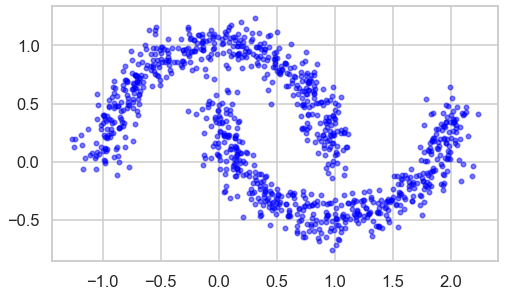

In [74]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X)

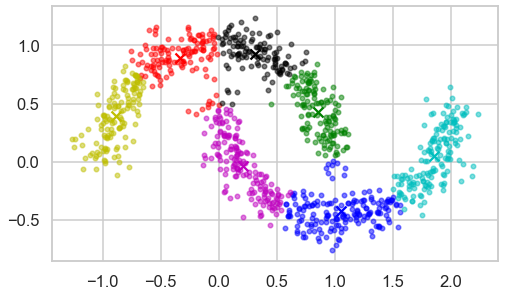

In [75]:
num_clusters = 7
km =KMeans(n_clusters = num_clusters, random_state=10, n_init = 1)
km.fit(X)
display_cluster(X, km, num_clusters)

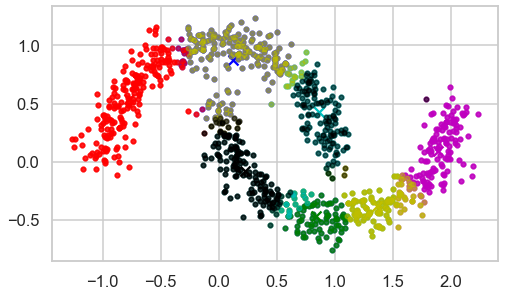

In [113]:
num_clusters = 7
# km =KMeans(n_clusters = num_clusters, random_state=10, n_init = 1)
km = GUC_Kmean(list(X), num_clusters, "Ecluidian")
# km.fit(X)
My_display_cluster(X, km, num_clusters)
# there exists some differences because I do use random values 
#different than the random state seed in the function

In [57]:
for i in range(len(X)) :
    X[i]=tuple(X[i])
print(X)

[[-1.03862653  0.54431327]
 [ 0.74874558 -0.44597557]
 [ 0.17498719  0.21428891]
 ...
 [ 0.1856932   0.82987384]
 [ 1.16688137  0.3690541 ]
 [-0.92827669  0.20778299]]


## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [146]:
def Example1():
    # prepare the figure sise and background 
    # this part can be replaced by a number of subplots 
    plt.rcParams['figure.figsize'] = [8, 8]
    sns.set_style("whitegrid")
    sns.set_context("talk")
    # Produce a data set that represent the x and y o coordinates of a circle 
    # this part can be replaced by data that you import froma file 
    angle = np.linspace(0, 2 * np.pi, 20, endpoint=False)
    X = np.append([np.cos(angle)], [np.sin(angle)], 0).transpose()
    return X

In [147]:
def Example2():
    n_samples = 1000
    n_bins = 4
    centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9, 9)]
    X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                      centers=centers, shuffle=False, random_state=42)
    return X

In [148]:
def Example3():
    n_samples = 1000
    X, y = noisy_moons = make_moons(n_samples=n_samples, noise=.1)
    return X

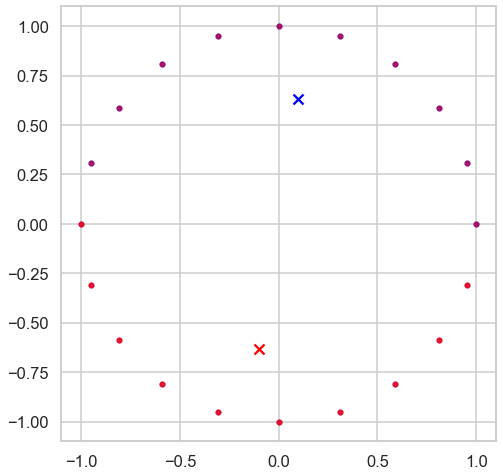

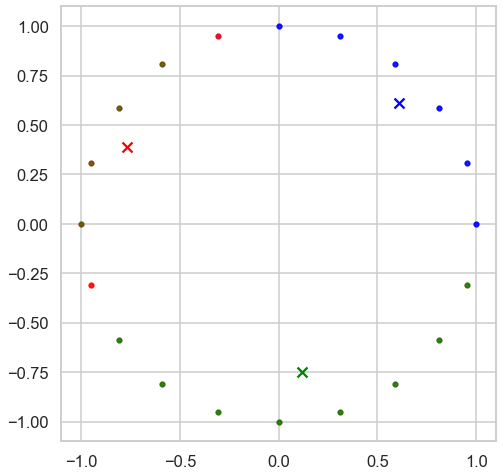

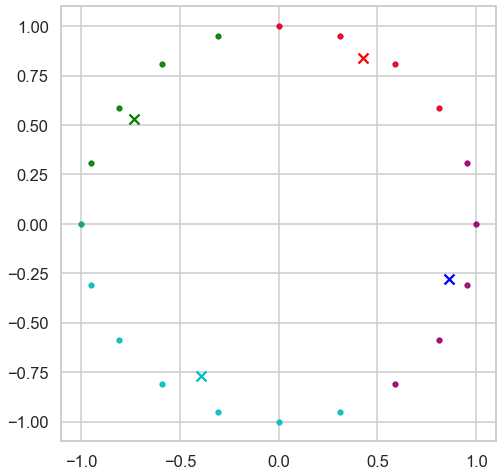

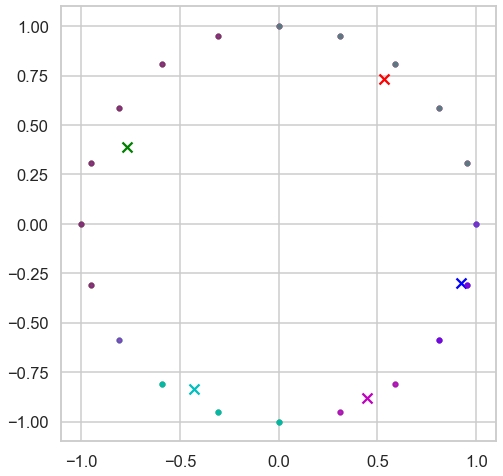

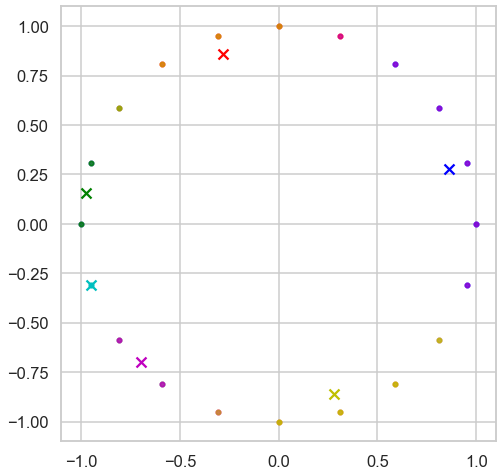

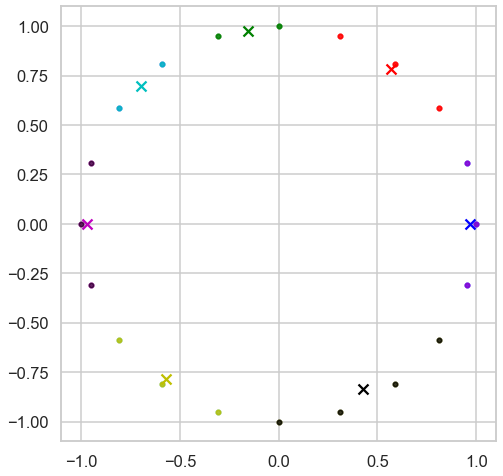

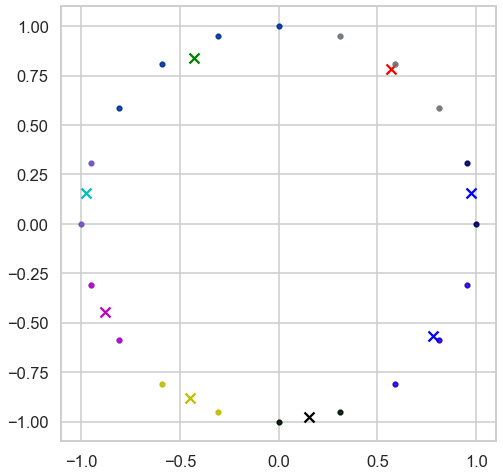

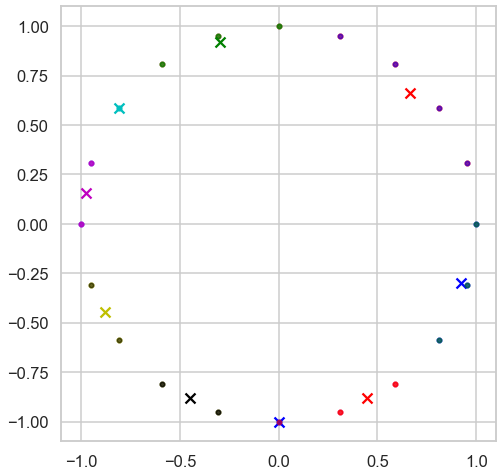

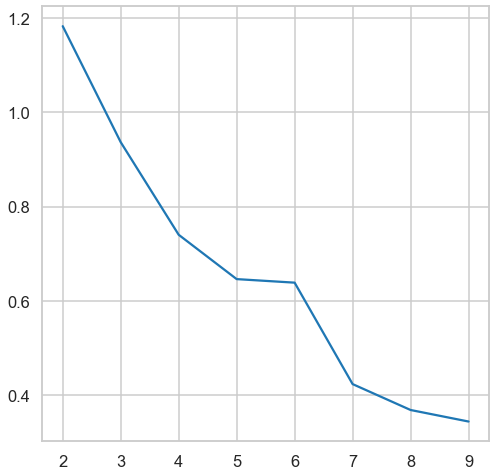

In [172]:
# Example 1
metric_list=[]
for num_clusters in range(2, 10):
    X=Example1()
    km = GUC_Kmean(list(X), num_clusters, "Ecluidian")
    metric_list.append(km[1])
    plt.figure() 
    My_display_cluster(X, km, num_clusters)
plt.figure() 
plt.plot(range(2, 10),metric_list)

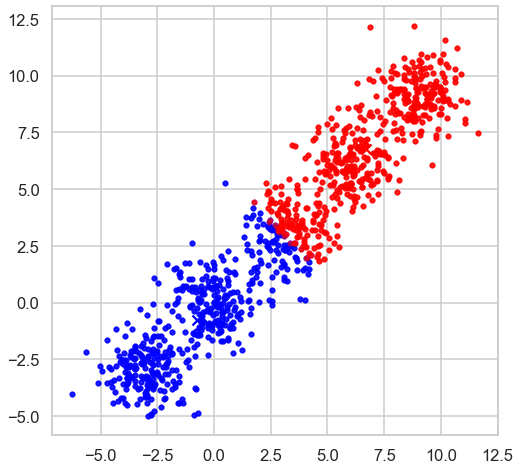

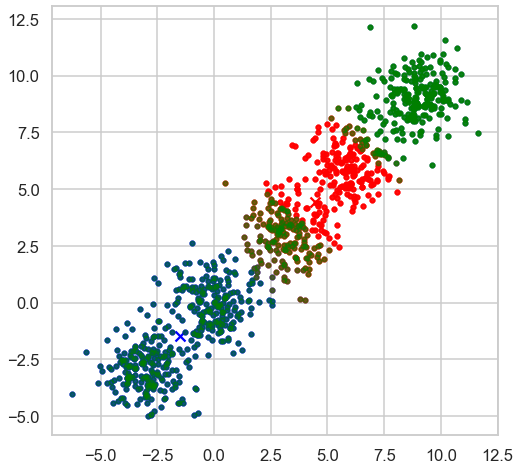

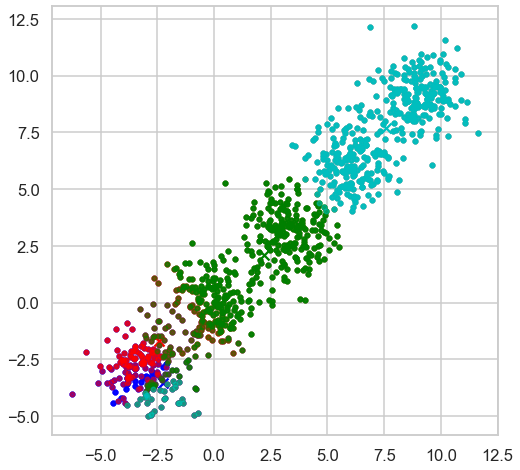

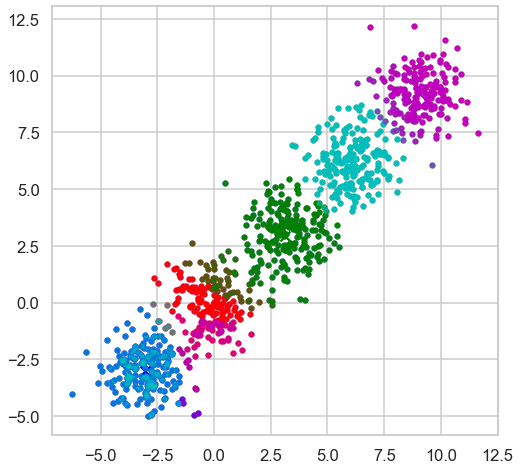

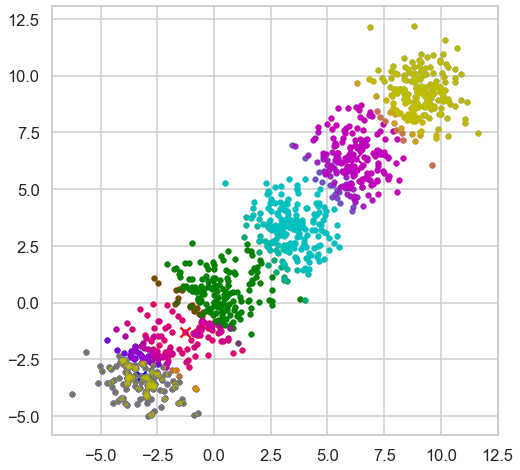

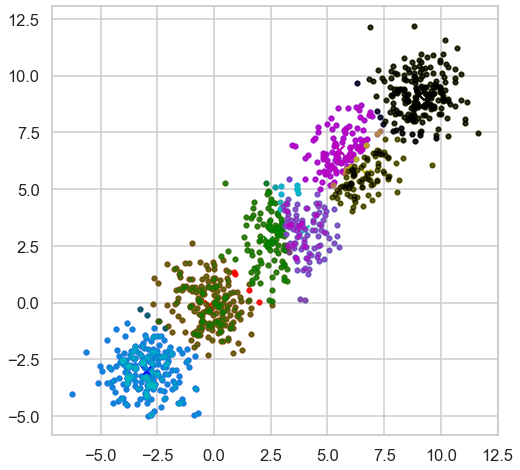

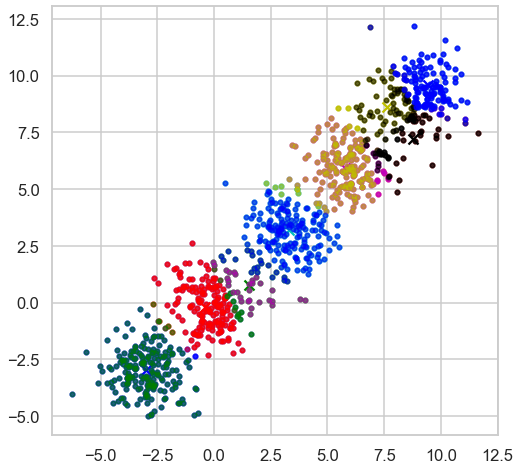

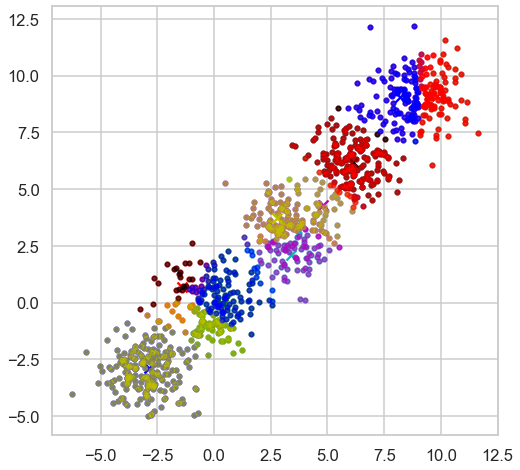

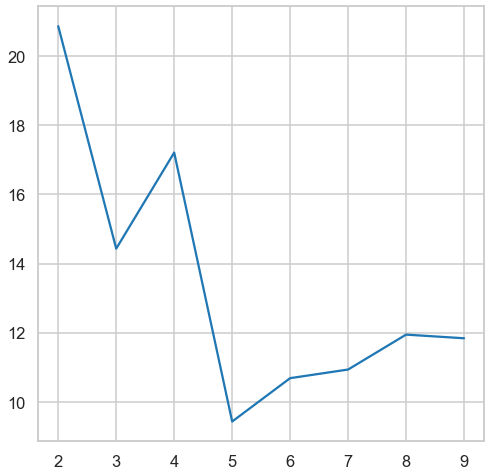

In [174]:
# Example 2
metric_list=[]
for num_clusters in range(2, 10):
    X=Example2()
    km = GUC_Kmean(list(X), num_clusters, "Ecluidian")
    metric_list.append(km[1])
    plt.figure() 
    My_display_cluster(X, km, num_clusters)
plt.figure() 
plt.plot(range(2, 10),metric_list)

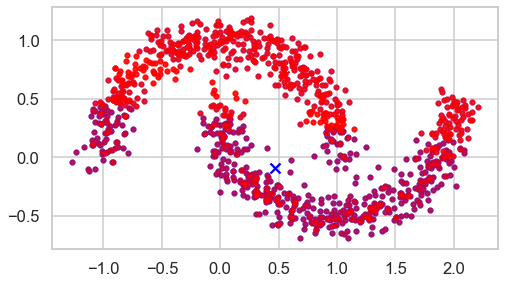

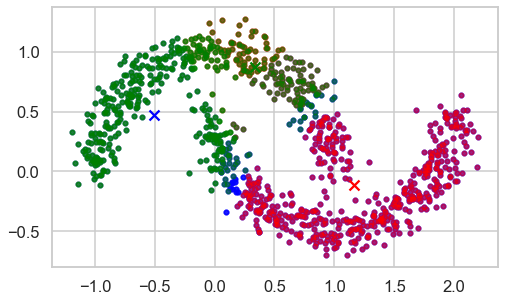

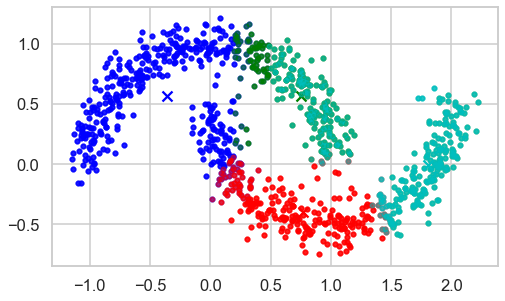

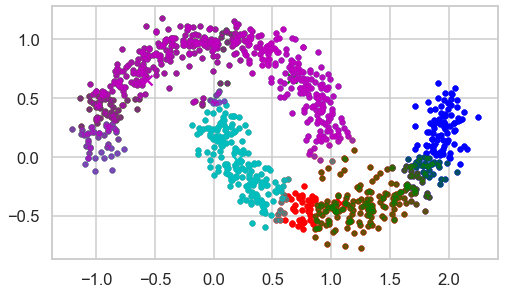

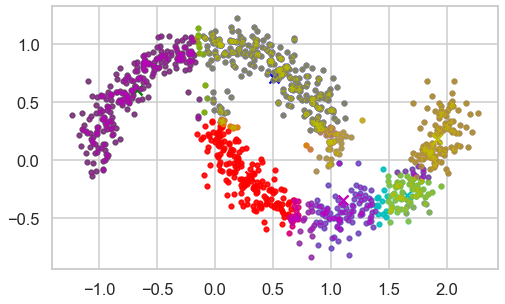

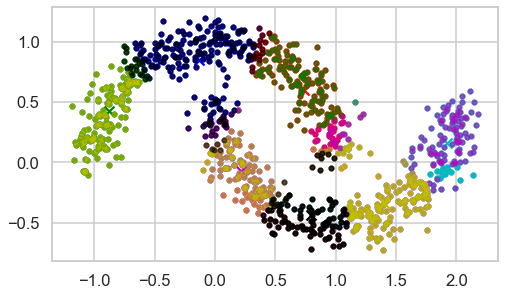

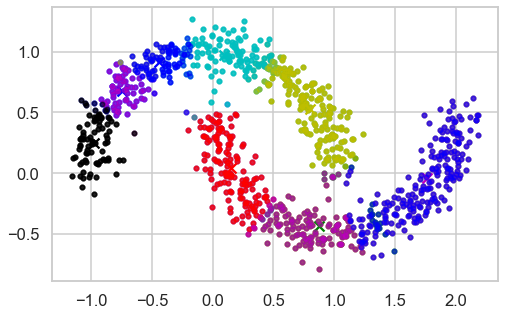

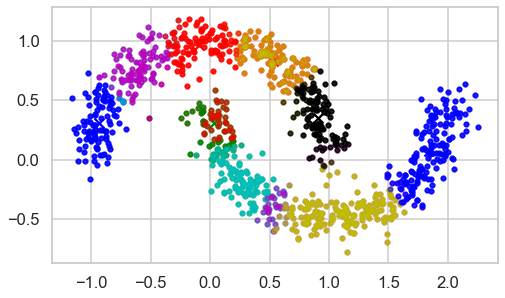

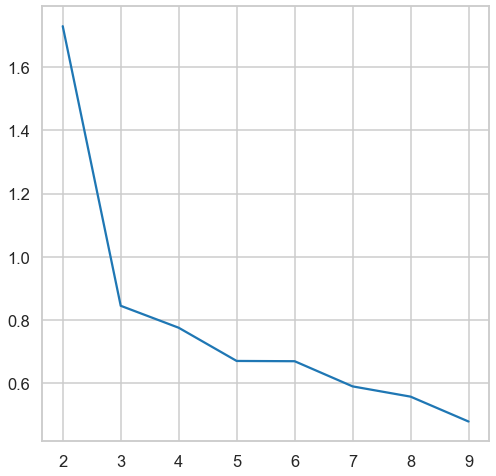

In [173]:
# Example 3
metric_list=[]
for num_clusters in range(2, 10):
    X=Example3()
    km = GUC_Kmean(list(X), num_clusters, "Ecluidian")
    metric_list.append(km[1])
    plt.figure() 
    My_display_cluster(X, km, num_clusters)
plt.figure() 
plt.plot(range(2, 10),metric_list)

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [6]:
from sklearn.decomposition import PCA
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from scipy.spatial import distance

In [7]:
data=pd.read_csv("Customer data.csv")
data.head()


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [8]:
# PCA is an unspuervised technique for multivariables
# used for set identification (Andrew ng ML course)
pca = PCA(2)
data = pca.fit_transform(data)
data

array([[  3720.13852186,    982.40128779],
       [ 29822.85339131,    861.45599927],
       [-31739.49790755,   1143.37368014],
       ...,
       [-34558.63873175,   -838.68341481],
       [-22990.76629242,   -892.84478844],
       [-52542.45852616,   -758.03073432]])

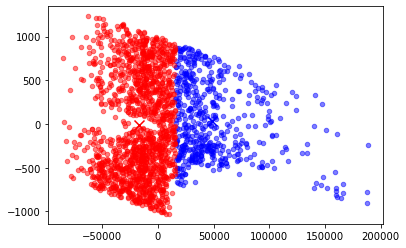

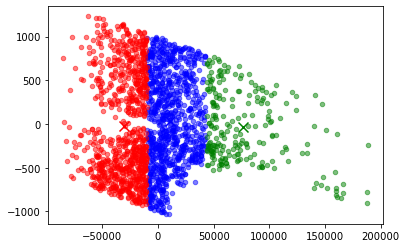

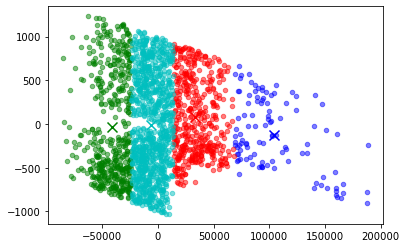

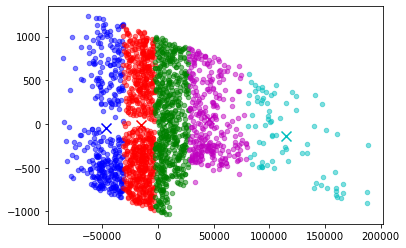

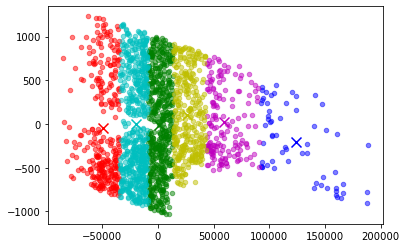

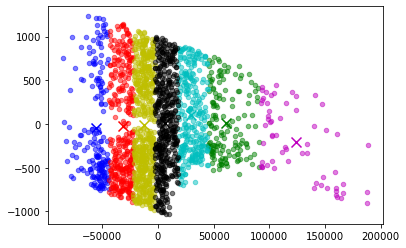

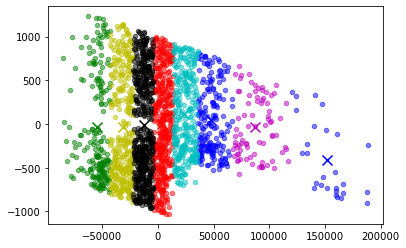

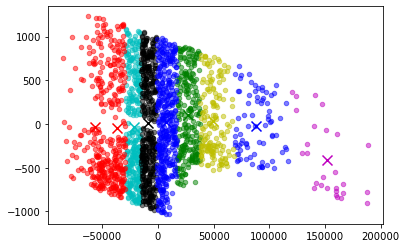

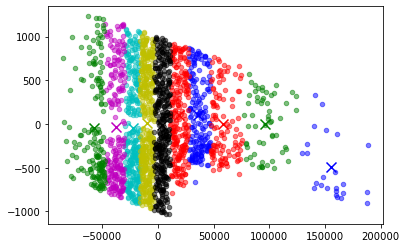

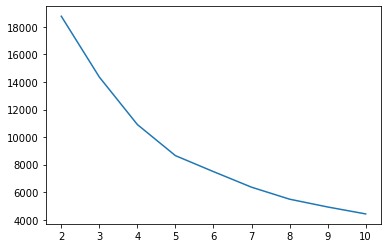

In [24]:
#  segment customers
metric_list=[]
for num_clusters in range(2, 10):
    km = GUC_Kmean(list(data), num_clusters, "Ecluidian")
    metric_list.append(km[1])
    plt.figure() 
    My_display_cluster(list(data), km, num_clusters)
plt.figure() 
plt.plot(range(2, 10),metric_list)

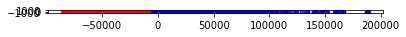

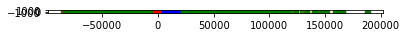

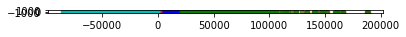

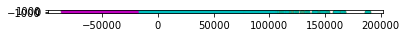

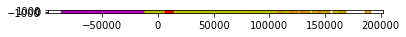

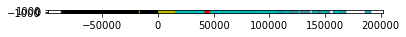

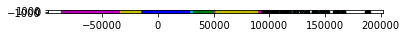

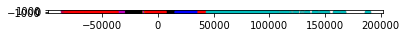

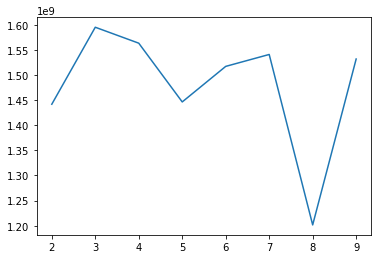

In [9]:
#  segment customers using different method with Pearson distance

metric_list=[]
for num_clusters in range(2, 10):
    km = GUC_Kmean(list(data), num_clusters, "Pearson")
    metric_list.append(km[1])
    plt.figure() 
    My_display_cluster(list(data), km, num_clusters)
plt.figure() 
plt.plot(range(2, 10),metric_list)